In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import ast

csv_file_path = "processed_hourly_2015.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

colData = df.columns.tolist()

for col in colData:
    if col == "input" or col == 'output':
        df[col] = df[col].apply(ast.literal_eval)
        
df = df[df['input'].apply(len) == 60]
df = df[df['output'].apply(len) == 90]



In [25]:
def merge_input_columns(row):
    return [row['day'], row['month'], row['week'], row['hour']] + row['input']

df['merged_input'] = df.apply(merge_input_columns, axis=1)

X = np.array(df['merged_input'].tolist())
y = np.array(df['output'].tolist())

print(X.shape)
print(y.shape)

train_data_input, train_data_output, test_data_input, test_data_output = X[:800], y[:800], X[800:], y[800:]

print("-----------")
print(X)
print(y)



(882, 64)
(882, 90)
-----------
[[0.00000e+00 1.00000e+00 3.00000e+00 ... 8.28555e+03 8.28420e+03
  8.28435e+03]
 [0.00000e+00 1.00000e+00 3.00000e+00 ... 8.28820e+03 8.28750e+03
  8.28775e+03]
 [0.00000e+00 1.00000e+00 3.00000e+00 ... 8.26790e+03 8.26830e+03
  8.27085e+03]
 ...
 [3.00000e+00 1.20000e+01 5.00000e+00 ... 7.91430e+03 7.91460e+03
  7.91340e+03]
 [3.00000e+00 1.20000e+01 5.00000e+00 ... 7.90840e+03 7.90780e+03
  7.90720e+03]
 [3.00000e+00 1.20000e+01 5.00000e+00 ... 7.91585e+03 7.91635e+03
  7.91480e+03]]
[[8289.   8291.85 8285.2  ... 8285.6  8283.2  8285.95]
 [8287.4  8285.95 8286.5  ... 8260.2  8252.6  8257.45]
 [8292.15 8290.15 8288.5  ... 8271.35 8269.3  8267.85]
 ...
 [7906.85 7906.35 7906.25 ... 7908.5  7908.95 7907.5 ]
 [7913.3  7913.95 7914.   ... 7906.2  7906.3  7905.8 ]
 [7907.2  7906.75 7905.75 ... 7925.3  7924.2  7923.4 ]]


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your dataset inputs and outputs respectively
# Train-test split
train_data_input, train_data_output = X[:800], y[:800]
test_data_input, test_data_output = X[800:], y[800:]

# Define the neural network
def create_model():
    model = Sequential([
        Dense(65, activation='linear', input_shape=(64,)),
        Dense(70, activation='linear'),
        Dense(75, activation='linear'),
        Dense(80, activation='linear'),
        Dense(85, activation='linear'),
        Dense(90, activation='linear')  # Output layer with 90 units
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Create the model
model = create_model()

# Display the model summary
model.summary()

# Train the model
model.fit(train_data_input, train_data_output, epochs=100, batch_size=1, shuffle=False)



2024-06-08 12:15:13.476566: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-08 12:15:13.711453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 12:15:14.782650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/gitesh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model in

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 65)             │         4,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 70)             │         4,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 75)             │         5,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 80)             │         6,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 85)             │         6,885 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 90)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,875 (136.23 KB)

 Trainable params: 34,875 (136.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3279667.7500
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4063.1157
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5805.8247
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7266.5098
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10142.4424
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7290.7959
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7594.7695
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6610.6128
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6031.6553
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5333.1187
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4864.6060
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4612.8232
Epoch 13/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4350.9219
Epoch 14/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4252.89

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 810.2842 
Test loss: 831.0059204101562
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


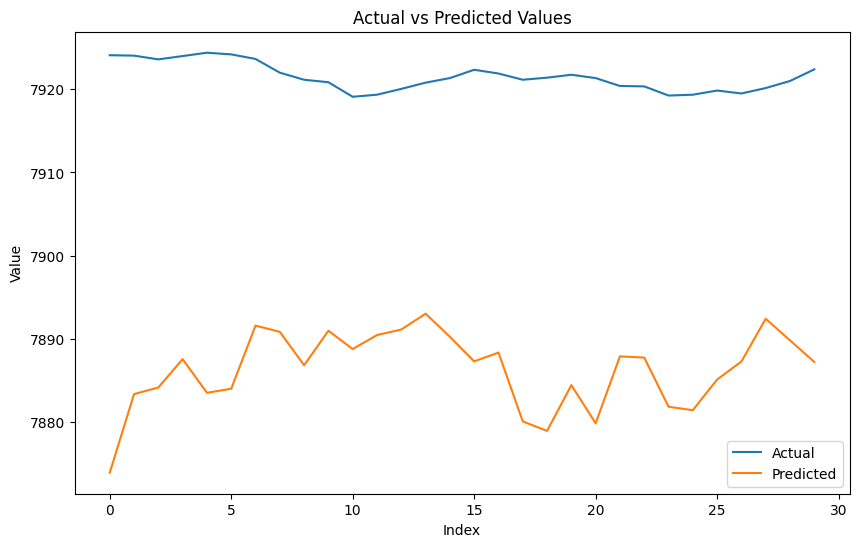

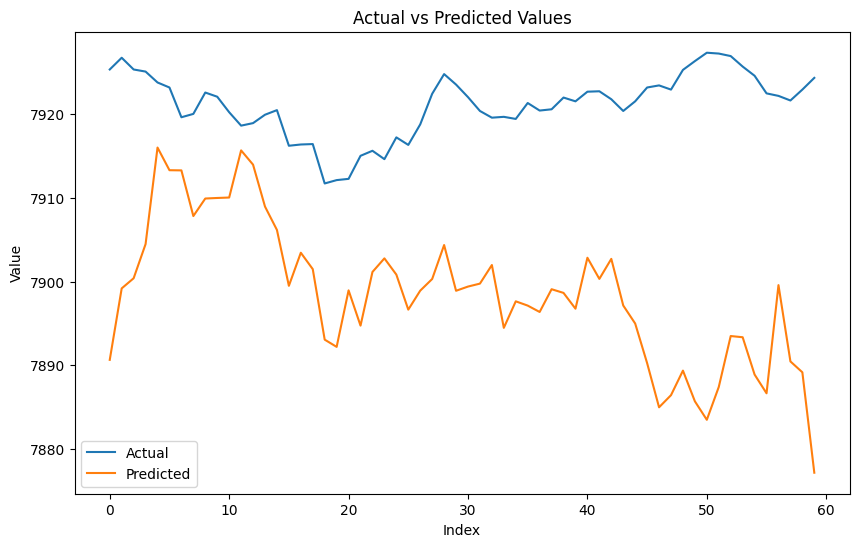

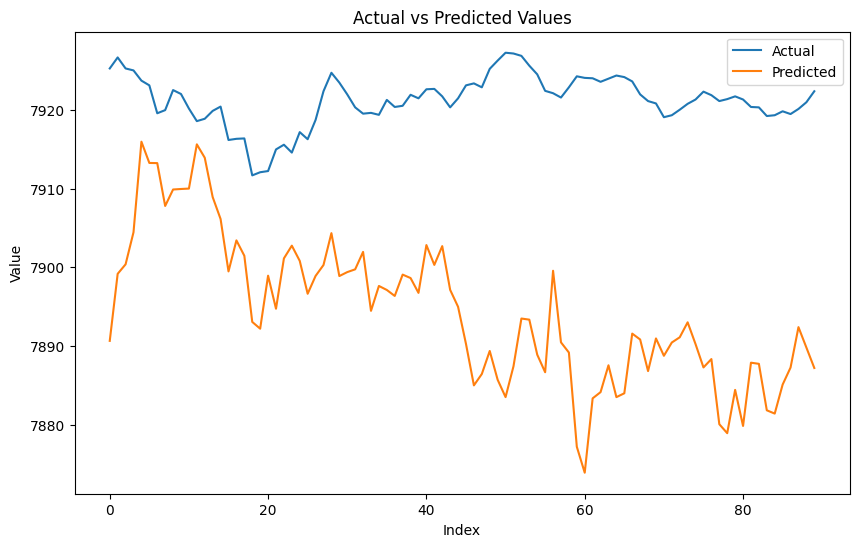

In [31]:
# Evaluate the model on the test data
import matplotlib.pyplot as plt

loss = model.evaluate(test_data_input, test_data_output)
print(f'Test loss: {loss}')

predictions = model.predict(test_data_input)

# for i in range(len(predictions)):
#     actual = test_data_output[i]
#     predicted = predictions[i]

plt.figure(figsize=(10, 6))
plt.plot(test_data_output[0][60:], label='Actual')
plt.plot(predictions[0][60:], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_data_output[0][:60], label='Actual')
plt.plot(predictions[0][:60], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_data_output[0], label='Actual')
plt.plot(predictions[0], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

